In [20]:
import sqlite3 as sql

import numpy as np
import pandas as pd
from pandas import cut, read_sql
import pickle as pkl
from random import choices
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.optimize as optimize

from standard_plotting import set_size
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
}

plt.rcParams.update(tex_fonts)
outdir = "/groups/icecube/peter/workspace/analyses/multiclassification_track_cascade_neutrinos/plots/monte_carlo_results/"


In [2]:
indir_MC = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/inference/track_cascade_sets/Monte_Carlo_all_events_all_variables.csv"
MC_in = pd.read_csv(indir_MC,usecols=['pid','pid_neutrino_pred_logit','energy','zenith','azimuth','position_z','position_x','position_y','total_osc_weight']).reset_index(drop = True)

In [3]:
MC = MC_in[MC_in['pid'].isin((-12,12,-14,14,-16,16))]
MC.head(1)

,energy,zenith,azimuth,pid,pid_neutrino_pred_logit,position_x,position_y,position_z,total_osc_weight
0,3.170023,1.586985,4.110935,-14.0,7.834167,101.276772,-76.372551,-336.303162,4.011465e-10


In [4]:
zenith_bins = np.linspace(0,np.pi,51)
zenith_middle = (zenith_bins[:-1] + zenith_bins[1:])/2
efficiency_zenith = np.zeros_like(zenith_middle)
rate_zenith = np.zeros_like(zenith_middle)


for i in range(len(zenith_bins)-1):
    min = zenith_bins[i]
    max = zenith_bins[i+1]
    total = np.sum(MC['total_osc_weight'][(MC['zenith']>min)&(MC['zenith']<max)])
    selected = np.sum(MC['total_osc_weight'][(MC['zenith']>min)&(MC['zenith']<max)&(MC['pid_neutrino_pred_logit']>12)])
    efficiency_zenith[i] = (selected/total)
    rate_zenith[i] = total

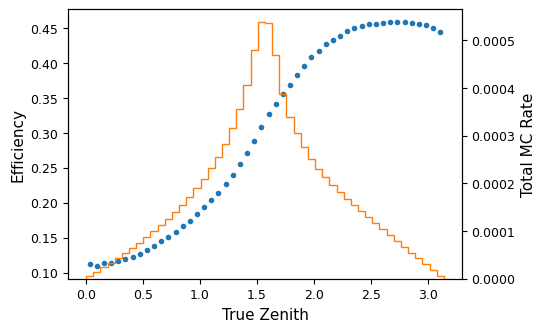

In [5]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1,subplots=(1,1)))

axs.plot(zenith_middle,efficiency_zenith,'.')
axs.set_xlabel('True Zenith')
axs.set_ylabel('Efficiency')
#axs.legend()
axs12 = axs.twinx()
axs12.stairs(np.array(rate_zenith),zenith_bins,label='Total Rate', color='C1')
axs12.set_ylabel('Total MC Rate')
fig.tight_layout()
#outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/muon_noise_(neutrinos)/"
#fig.savefig(outdir + 'muon_noise_neutrinos_where_in_track_probability.png',bbox_inches='tight')

In [6]:
azimuth_bins = np.linspace(0,2*np.pi,51)
azimuth_middle = (azimuth_bins[:-1] + azimuth_bins[1:])/2
efficiency_azimuth = np.zeros_like(azimuth_middle)
rate_azimuth = np.zeros_like(azimuth_middle)


for i in range(len(azimuth_bins)-1):
    min = azimuth_bins[i]
    max = azimuth_bins[i+1]
    total = np.sum(MC['total_osc_weight'][(MC['azimuth']>min)&(MC['azimuth']<max)])
    selected = np.sum(MC['total_osc_weight'][(MC['azimuth']>min)&(MC['azimuth']<max)&(MC['pid_neutrino_pred_logit']>12)])
    efficiency_azimuth[i] = (selected/total)
    rate_azimuth[i] = total

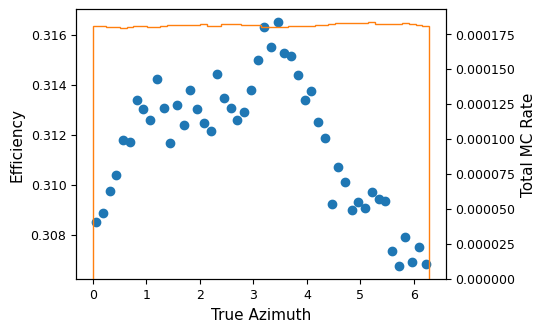

In [7]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1,subplots=(1,1)))

axs.plot(azimuth_middle,efficiency_azimuth,'o')
axs.set_xlabel('True Azimuth')
axs.set_ylabel('Efficiency')
axs12 = axs.twinx()
axs12.stairs(np.array(rate_azimuth),azimuth_bins,label='Total Rate', color='C1')
axs12.set_ylabel('Total MC Rate')
#axs.legend()


fig.tight_layout()
#outdir = "/groups/icecube/petersen/GraphNetDatabaseRepository/multi_classification_track_cascade_neutrino/using_new_muons_Peter_database/plotting/Comparison_using_lvl_3_cut/muon_noise_(neutrinos)/"
#fig.savefig(outdir + 'muon_noise_neutrinos_where_in_track_probability.png',bbox_inches='tight')

In [8]:
print(np.sum(MC['total_osc_weight'][MC['pid'].isin((-12,12,-14,14,-16,16))]))

0.009066475254361286


In [9]:
position_z_bins = np.linspace(-1200,0,101)
position_z_middle = (position_z_bins[:-1] + position_z_bins[1:])/2
efficiency_position_z = np.zeros_like(position_z_middle)
rate_position_z = np.zeros_like(position_z_middle)


for i in range(len(position_z_bins)-1):
    min = position_z_bins[i]
    max = position_z_bins[i+1]
    total = np.sum(MC['total_osc_weight'][(MC['position_z']>min)&(MC['position_z']<max)])
    if total == 0:
        efficiency_position_z[i] = 0
    else:
        selected = np.sum(MC['total_osc_weight'][(MC['position_z']>min)&(MC['position_z']<max)&(MC['pid_neutrino_pred_logit']>12)])
        efficiency_position_z[i] = (selected/total)
    rate_position_z[i] = total

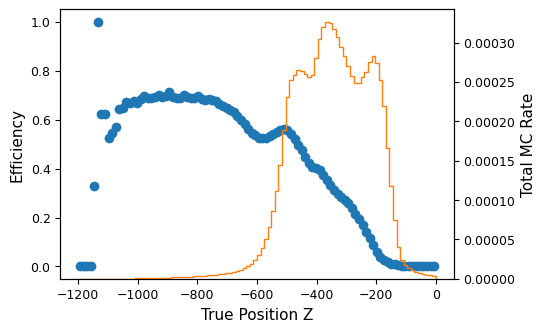

In [10]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1,subplots=(1,1)))

axs.plot(position_z_middle,efficiency_position_z,'o')
axs.set_xlabel('True Position Z')
axs.set_ylabel('Efficiency')
#axs.legend()
axs12 = axs.twinx()
axs12.stairs(np.array(rate_position_z),position_z_bins,label='Total Rate', color='C1')
axs12.set_ylabel('Total MC Rate')

fig.tight_layout()

In [11]:
MC['energy'] = np.log10(MC['energy'])

/tmp/ipykernel_18983/1921087503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MC['energy'] = np.log10(MC['energy'])


In [12]:


energy_bins = np.linspace(0,4,51)
energy_middle = (energy_bins[:-1] + energy_bins[1:])/2
efficiency_energy = np.zeros_like(energy_middle)
rate_energy = np.zeros_like(energy_middle)


for i in range(len(energy_bins)-1):
    min = energy_bins[i]
    max = energy_bins[i+1]
    total = np.sum(MC['total_osc_weight'][(MC['energy']>min)&(MC['energy']<max)])
    if total == 0:
        efficiency_energy[i] = 0
    else:
        selected = np.sum(MC['total_osc_weight'][(MC['energy']>min)&(MC['energy']<max)&(MC['pid_neutrino_pred_logit']>12)])
        efficiency_energy[i] = (selected/total)
    rate_energy[i] = total

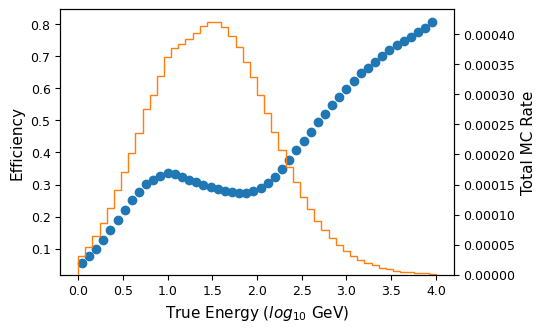

In [13]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1,subplots=(1,1)))

axs.plot(energy_middle,efficiency_energy,'o')
axs.set_xlabel(r'True Energy ($log_{10}$ GeV)')
axs.set_ylabel('Efficiency')
axs12 = axs.twinx()
axs12.stairs(np.array(rate_energy),energy_bins,label='Total Rate', color='C1')
axs12.set_ylabel('Total MC Rate')
#axs.legend()


fig.tight_layout()

          energy    zenith   azimuth   pid  pid_neutrino_pred_logit  \
1354  290.193736  1.116626  4.879525  13.0                -8.797648   

      position_x  position_y  position_z  total_osc_weight  
1354 -172.210632   37.578335 -343.192261          0.000021  


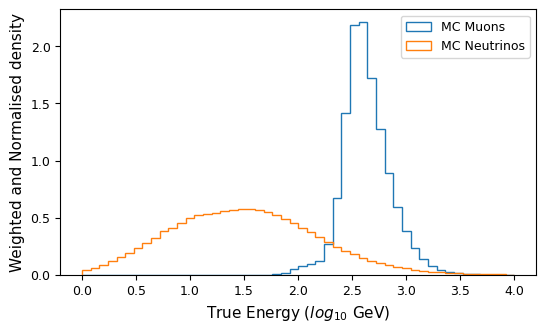

In [14]:
MC_muons = MC_in[MC_in['pid'].isin((-13,13))]
print(MC_muons.head(1))

fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1,subplots=(1,1)))
axs.hist(np.log10(MC_muons['energy']),bins=energy_bins,label='MC Muons', weights=MC_muons['total_osc_weight'],density=True,histtype='step')
axs.hist(MC['energy'],bins=energy_bins,label='MC Neutrinos', weights=MC['total_osc_weight'],density=True,histtype='step')
#axs.stairs(np.array(rate_energy),energy_bins,label='MC Neutrinos', color='C1')
axs.set_xlabel(r'True Energy ($log_{10}$ GeV)')
axs.set_ylabel('Weighted and Normalised density')
axs.legend()



fig.tight_layout()

In [15]:
def calc_rho_36(x,y) :
    '''
    Radial distance from string 36 (approximately central within DeepCore)
    '''
    return np.sqrt( (x-46.29) ** 2 + (y+34.88) ** 2 )

In [16]:
MC['rho'] = calc_rho_36(MC['position_x'].values,MC['position_y'].values)

/tmp/ipykernel_18983/1297060929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MC['rho'] = calc_rho_36(MC['position_x'].values,MC['position_y'].values)


In [17]:

rho_bins = np.linspace(0,500,101)
rho_middle = (rho_bins[:-1] + rho_bins[1:])/2
efficiency_rho = np.zeros_like(rho_middle)
rate_rho = np.zeros_like(rho_middle)


for i in range(len(rho_bins)-1):
    min = rho_bins[i]
    max = rho_bins[i+1]
    total = np.sum(MC['total_osc_weight'][(MC['rho']>min)&(MC['rho']<max)])
    if total == 0:
        efficiency_rho[i] = 0
    else:
        selected = np.sum(MC['total_osc_weight'][(MC['rho']>min)&(MC['rho']<max)&(MC['pid_neutrino_pred_logit']>12)])
        efficiency_rho[i] = (selected/total)
    rate_rho[i] = total

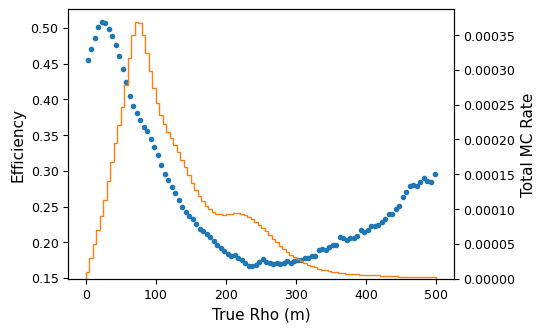

In [18]:
fig, axs = plt.subplots(figsize=set_size('thesis',fraction=1,subplots=(1,1)))

axs.plot(rho_middle,efficiency_rho,'.')
axs.set_xlabel(r'True Rho (m)')
axs.set_ylabel('Efficiency')
axs12 = axs.twinx()
axs12.stairs(np.array(rate_rho),rho_bins,label='Total Rate', color='C1')
axs12.set_ylabel('Total MC Rate')
#axs.legend()


fig.tight_layout()

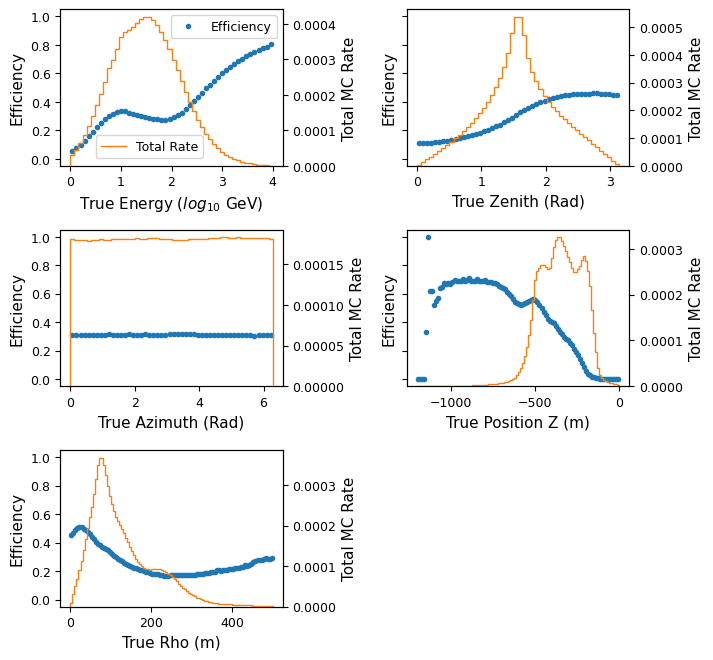

In [21]:
fig, axs = plt.subplots(3,2,figsize=set_size('thesis',fraction=1.3,subplots=(3,2)),sharey=True)


axs[0,0].plot(energy_middle,efficiency_energy,'.',label='Efficiency')
axs[0,0].set_xlabel(r'True Energy ($log_{10}$ GeV)')
axs[0,0].set_ylabel('Efficiency')
axs1 = axs[0,0].twinx()
axs1.stairs(np.array(rate_energy),energy_bins,label='Total Rate',color='C1')
axs[0,0].legend()
axs1.legend(bbox_to_anchor=(0.4, 0.05), loc='lower center', borderaxespad=0)
axs1.set_ylabel('Total MC Rate')

axs[0,1].plot(zenith_middle,efficiency_zenith,'.')
axs[0,1].set_xlabel(r'True Zenith (Rad)')
axs[0,1].set_ylabel('Efficiency')
axs2 = axs[0,1].twinx()
axs2.stairs(np.array(rate_zenith),zenith_bins,label='Total Rate',color='C1')
axs2.set_ylabel('Total MC Rate')

axs[1,0].plot(azimuth_middle,efficiency_azimuth,'.')
axs[1,0].set_xlabel(r'True Azimuth (Rad)')
axs[1,0].set_ylabel('Efficiency')
axs3 = axs[1,0].twinx()
axs3.stairs(np.array(rate_azimuth),azimuth_bins,label='Total Rate',color='C1')
axs3.set_ylabel('Total MC Rate')

axs[1,1].plot(position_z_middle,efficiency_position_z,'.')
axs[1,1].set_xlabel(r'True Position Z (m)')
axs[1,1].set_ylabel('Efficiency')
axs4 = axs[1,1].twinx()
axs4.stairs(np.array(rate_position_z),position_z_bins,label='Total Rate',color='C1')
axs4.set_ylabel('Total MC Rate')

axs[2,0].plot(rho_middle,efficiency_rho,'.')
axs[2,0].set_xlabel(r'True Rho (m)')
axs[2,0].set_ylabel('Efficiency')
axs5 = axs[2,0].twinx()
axs5.stairs(np.array(rate_rho),rho_bins,label='Total Rate',color='C1')
axs5.set_ylabel('Total MC Rate')

fig.delaxes(axs[2,1])

fig.tight_layout()
fig.savefig(outdir + 'efficiency_plots.png',bbox_inches='tight',dpi=200)